In [1]:
# Here, Z is converted into solar units:
#     Z_sim is in mass fraction units
#     Z_arr = Z_sim/0.02
#     kappa = 1000*m_p*Z_arr  --> in n_LW & n_LW_ss
#     denominator = CC * Z_arr * n_H  --> in X_H2
#     n_CO = 1e-4*n_H*X_CO*Z_arr

In [2]:
%%time
import timing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import center_and_r_vir, remove_bulk_velocity
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure

0:00:00.576 - Start Program

CPU times: user 701 ms, sys: 297 ms, total: 998 ms
Wall time: 4.86 s


In [3]:
path = "bulk1/data_2/hydro_59/output/"
data = pynbody.load(path + "output_00050")

aexp = data.properties['a']
data.physical_units()
r_vir = center_and_r_vir(data, aexp, path)
remove_bulk_velocity(data)
r_e = 0.1 * r_vir
sph_5 = pynbody.filt.Sphere(radius='%f kpc' % (r_e*1.4))
region = data[sph_5]
f = open(data.filename + "/info_"+data.filename[-5:]+".txt","r")
lines = f.readlines()
f.close()

for line in lines:
    if line[0:13]=="unit_l      =":
        print line[:-1]
        unit_l = float(line[14:-1])
    if line[0:13]=="unit_d      =":
        print line[:-1]
        unit_d = float(line[14:-1])
    if line[0:13]=="unit_t      =":
        print line[:-1]
        unit_t = float(line[14:-1])
    if line[0:13]=="omega_b     =":
        print line[:-1]
        omega_b = float(line[14:-1])

('shifting on Stars:', SimArray([ 0.00308878, -0.03302971, -0.04676732], 'kpc'))
('virial radius:', SimArray(152.40432611, 'kpc'))
omega_b     =  0.450000017881393E-01
unit_l      =  0.682025380323961E+26
unit_d      =  0.123367583719985E-28
unit_t      =  0.163687521954501E+18


In [8]:
%%time
X_H2_bar = np.load('outputs/parallel_code/X_H2_bar_hydro_59_output_00050.npy')
X_CO_bar = np.load('outputs/parallel_code/X_CO_bar_hydro_59_output_00050.npy')
n_H_mean_arr = np.load('outputs/parallel_code/n_H_mean_arr_hydro_59_output_00050.npy')
mach_no_arr = np.load('outputs/parallel_code/mach_no_arr_hydro_59_output_00050.npy')
Z_arr = np.load('outputs/parallel_code/Z_arr_hydro_59_output_00050.npy')
temperature = np.load('outputs/parallel_code/T_hydro_59_output_00050.npy')

CPU times: user 10.2 ms, sys: 62.3 ms, total: 72.5 ms
Wall time: 211 ms


In [24]:
%%time
min_H = np.min(X_H2_bar)
max_H = np.max(X_H2_bar)
min_C = np.min(X_CO_bar)
max_C = np.max(X_CO_bar)
min_n = np.log10(np.min(n_H_mean_arr))
max_n = np.log10(np.max(n_H_mean_arr))
min_M = np.min(mach_no_arr)
max_M = np.max(mach_no_arr)
min_Z = np.min(Z_arr)
max_Z = np.max(Z_arr)
# min_T = np.min(temperature)
# max_T = np.max(temperature)

CPU times: user 15.9 ms, sys: 4.09 ms, total: 20 ms
Wall time: 18.3 ms


In [10]:
region.gas["X_H2_bar"] = X_H2_bar
region.gas["X_CO_bar"] = X_CO_bar
region.gas["n_H_mean_arr"] = n_H_mean_arr
region.gas["mach_no_arr"] = mach_no_arr
region.gas["Z_arr"] = Z_arr

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


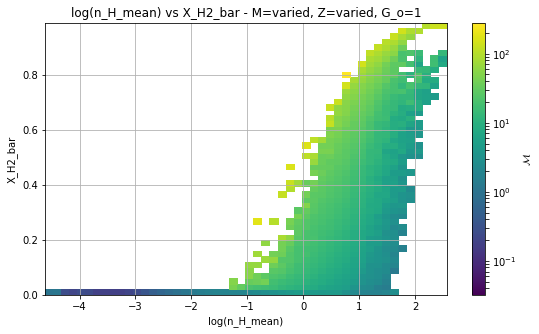

CPU times: user 1.34 s, sys: 67.9 ms, total: 1.41 s
Wall time: 1.4 s


In [25]:
%%time
plt.figure(figsize=(9,5))
histX_H2_M_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=mach_no_arr * region.gas["mass"], bins=50 , range=[[min_H,max_H],[min_n,max_n]])
histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , range=[[min_H,max_H],[min_n,max_n]])

yX_H2_M, xX_H2_M = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_H2_M_mass/histX_H2_mass, norm=LogNorm(), vmin=min_M, vmax=max_M, cmap='viridis')
plt.colorbar(label=r"$\mathcal{M}$")
plt.xlabel('log(n_H_mean)')
plt.ylabel('X_H2_bar')
plt.grid(b=True, which='both', axis='both')
plt.title('log(n_H_mean) vs X_H2_bar - M=varied, Z=varied, G_o=1')
plt.savefig('outputs/parallel_code/Hist-X_H2_bar-n_H_mean-M-parallel_code.png', dpi=300, bbox_inches='tight')
plt.show()


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


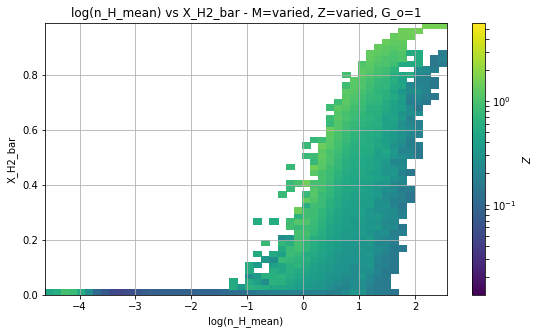

CPU times: user 1.2 s, sys: 15.8 ms, total: 1.22 s
Wall time: 1.21 s


In [22]:
%%time
plt.figure(figsize=(9,5))
histX_H2_M_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=Z_arr * region.gas["mass"], bins=50 , range=[[min_H,max_H],[min_n,max_n]])
histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , range=[[min_H,max_H],[min_n,max_n]])

yX_H2_Z, xX_H2_Z = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_H2_M_mass/histX_H2_mass, norm=LogNorm(), vmin=min_Z, vmax=max_Z, cmap="viridis")
plt.colorbar(label="$Z$")
plt.xlabel('log(n_H_mean)')
plt.ylabel('X_H2_bar')
plt.grid(b=True, which='both', axis='both')
plt.title('log(n_H_mean) vs X_H2_bar - M=varied, Z=varied, G_o=1')
plt.savefig('outputs/parallel_code/Hist-X_H2_bar-n_H_mean_Z-parallel_code.png', dpi=300, bbox_inches='tight')
plt.show()


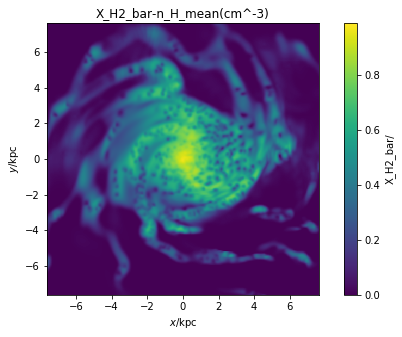

CPU times: user 23.5 s, sys: 2.75 s, total: 26.2 s
Wall time: 9.53 s


In [17]:
%%time
plt.figure(figsize=(9,5))
pynbody.plot.image(region.g, qty="X_H2_bar", width=r_e,
                   log=False, resolution=500, cmap="viridis", av_z="n_H_mean_arr",
                   vmin=min_H, vmax=max_H)
plt.title("X_H2_bar-n_H_mean(cm^-3)")
plt.savefig('outputs/parallel_code/X_H2_bar-n_H_mean-parallel_code.png', dpi=300, bbox_inches='tight')
plt.show()


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


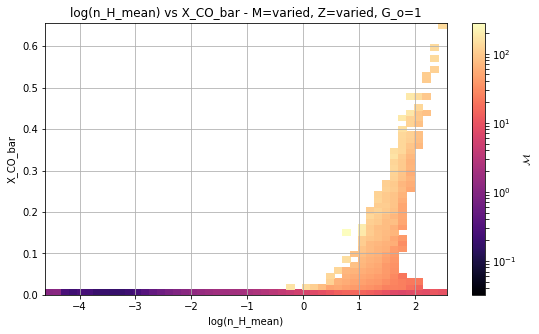

CPU times: user 1.41 s, sys: 19.5 ms, total: 1.43 s
Wall time: 1.4 s


In [26]:
%%time
plt.figure(figsize=(9,5))
histX_CO_M_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=mach_no_arr * region.gas["mass"], bins=50 , range=[[min_C,max_C],[min_n,max_n]])
histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , range=[[min_C,max_C],[min_n,max_n]])

yX_CO_M, xX_CO_M = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_CO_M_mass/histX_CO_mass, norm=LogNorm(), vmin=min_M, vmax=max_M, cmap="magma")
plt.colorbar(label=r"$\mathcal{M}$")
plt.xlabel('log(n_H_mean)')
plt.ylabel('X_CO_bar')
plt.grid(b=True, which='both', axis='both')
plt.title('log(n_H_mean) vs X_CO_bar - M=varied, Z=varied, G_o=1')
plt.savefig('outputs/parallel_code/Hist-X_CO_bar-n_H_mean-M-parallel_code.png', dpi=300, bbox_inches='tight')
plt.show()


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


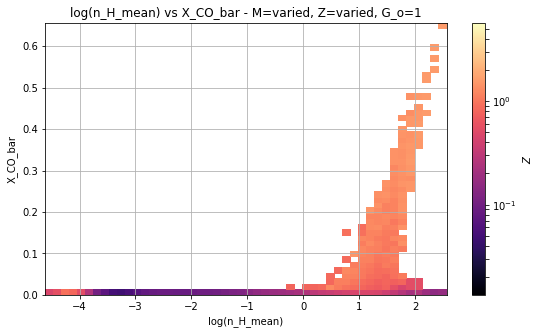

CPU times: user 1.24 s, sys: 23.6 ms, total: 1.26 s
Wall time: 1.26 s


In [21]:
%%time
plt.figure(figsize=(9,5))
histX_CO_M_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=Z_arr * region.gas["mass"], bins=50 , range=[[min_C,max_C],[min_n,max_n]])
histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , range=[[min_C,max_C],[min_n,max_n]])

yX_CO_Z, xX_CO_Z = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_CO_M_mass/histX_CO_mass, norm=LogNorm(), vmin=min_Z, vmax=max_Z, cmap="magma")
plt.colorbar(label="$Z$")
plt.xlabel('log(n_H_mean)')
plt.ylabel('X_CO_bar')
plt.grid(b=True, which='both', axis='both')
plt.title('log(n_H_mean) vs X_CO_bar - M=varied, Z=varied, G_o=1')
plt.savefig('outputs/parallel_code/Hist-X_CO_bar-n_H_mean_Z-parallel_code.png', dpi=300, bbox_inches='tight')
plt.show()


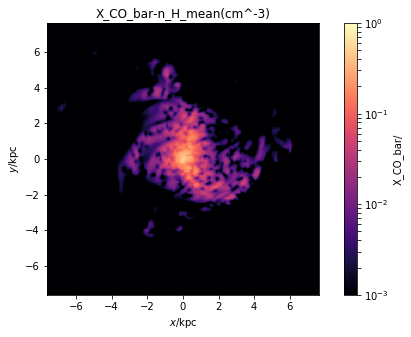

CPU times: user 24 s, sys: 2.65 s, total: 26.6 s
Wall time: 9.89 s


In [18]:
%%time
plt.figure(figsize=(9,5))
pynbody.plot.image(region.g, qty="X_CO_bar", width=r_e,
                   log=True, resolution=500, cmap="magma", av_z="n_H_mean_arr",
                   vmin=1e-3, vmax=1.0)
plt.title("X_CO_bar-n_H_mean(cm^-3)")
plt.savefig('outputs/parallel_code/X_CO_bar-n_H_mean-parallel_code.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# %%time
# plt.figure(figsize=(9,5))
# histX_H2_T_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
#                                weights=temperature * region.gas["mass"], bins=50 , range=[[min_H,max_H],[min_n,max_n]])
# histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
#                                weights=region.gas["mass"], bins=50 , range=[[min_H,max_H],[min_n,max_n]])

# yX_H2_M, xX_H2_M = yedges, xedges
# plt.pcolormesh(xedges, yedges, histX_H2_T_mass/histX_H2_mass, norm=LogNorm(), vmin=10, vmax=1e4, cmap='viridis')
# plt.colorbar(label="$T$")
# plt.xlabel('log(n_H_mean)')
# plt.ylabel('X_H2_bar')
# plt.grid(b=True, which='both', axis='both')
# plt.title('log(n_H_mean) vs X_H2_bar - M=10, Z=varied(solar), G_o=1, T=varied')
# plt.savefig('outputs/parallel_code/Hist-X_H2_bar-n_H_mean-T-3.9.png', dpi=300, bbox_inches='tight')
# plt.show()


In [ ]:
# %%time
# plt.figure(figsize=(9,5))
# histX_CO_T_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
#                                weights=temperature * region.gas["mass"], bins=50 , 
#                                                  range=[[min_C,max_C],[min_n,max_n]])
# histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
#                                weights=region.gas["mass"], bins=50 , range=[[min_C,max_C],[min_n,max_n]])

# yX_CO_Z, xX_CO_Z = yedges, xedges
# plt.pcolormesh(xedges, yedges, histX_CO_T_mass/histX_CO_mass, norm=LogNorm(), vmin=10, vmax=1e4, cmap="magma")
# plt.colorbar(label="$T$")
# plt.xlabel('log(n_H_mean)')
# plt.ylabel('X_CO_bar')
# plt.grid(b=True, which='both', axis='both')
# plt.title('log(n_H_mean) vs X_CO_bar - M=varied, Z=varied(solar), G_o=1, T=varied')
# plt.savefig('outputs/parallel_code/Hist-X_CO_bar-n_H_mean-T-3.9.png', dpi=300, bbox_inches='tight')
# plt.show()



In [14]:
len(n_H_mean_arr)

244522

In [16]:
g_o = np.logspace(0, 4.5, len(n_H_mean_arr))
g_o

array([1.00000000e+00, 1.00004238e+00, 1.00008475e+00, ...,
       3.16200967e+04, 3.16214366e+04, 3.16227766e+04])

In [17]:
max(g_o)

31622.776601683792

In [18]:
min(g_o)

1.0

In [20]:
np.size(g_o)

244522

In [27]:
aexp


0.600005205267563

In [13]:
T = region.gas["temp"]

In [14]:
np.min(T)

SimArray(12.30890401, 'K')

In [15]:
np.max(T)

SimArray(3.7084053e+08, 'K')

In [16]:
np.min(Z_arr)

0.02126032056381756

In [17]:
np.max(Z_arr)

5.697329413104828

In [18]:
np.min(mach_no_arr)

0.032081150756892815

In [19]:
np.max(mach_no_arr)

277.59727041447553

In [20]:
mask = np.logical_and(X_H2_bar > 0.6, np.log10(n_H_mean_arr) < -2.0)

In [21]:
T[mask]

SimArray([], dtype=float64, 'K')

In [22]:
mach_no_arr[mask]

array([], dtype=float64)

In [13]:
X_H2_bar

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
min(X_H2_bar)

0.0

In [15]:
max(X_H2_bar)

0.9965042930692912